In [47]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

import library


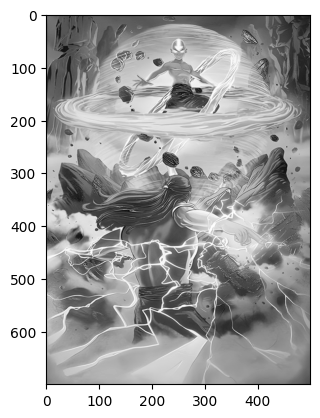

In [48]:
gambar_awal=cv.imread("D:/semester 4/PCD/materi/PENGOLAHAN-CITRA-DIGITAL/aang.jpg")
gambar_abu=(cv.cvtColor(gambar_awal,cv.COLOR_BGR2GRAY))
plt.imshow(gambar_abu,cmap="gray")


membuat function dilatasi


In [49]:
def zoom_image(image, zoom_factor):
    """
    Melakukan zoom ke bagian tengah gambar berdasarkan faktor zoom yang diberikan tanpa mengubah ukuran gambar asli.
    
    :param image: Array gambar yang diinput (dalam format numpy array).
    :param zoom_factor: Faktor seberapa besar zoom yang diinginkan. Nilai lebih besar dari 1 berarti gambar akan diperbesar.
    """
    # Mendapatkan tinggi dan lebar dari gambar asli
    height, width = image.shape[:2]
    
    # Menghitung tinggi dan lebar baru yang lebih kecil berdasarkan faktor zoom
    new_height, new_width = int(height / zoom_factor), int(width / zoom_factor)
    
    # Menghitung titik awal x dan y untuk crop, sehingga cropping terjadi di tengah gambar
    start_x = (width - new_width) // 2
    start_y = (height - new_height) // 2
    
    # Memotong bagian tengah gambar sesuai dengan ukuran baru yang telah dihitung
    cropped = image[start_y:start_y + new_height, start_x:start_x + new_width]
    
    # Mengubah ukuran gambar yang telah dipotong kembali ke ukuran asli gambar
    # Penggunaan cv2 (OpenCV) di sini membutuhkan impor library cv2 yang harus dilakukan di bagian atas kode
    if len(image.shape) > 2:
        # Jika gambar berwarna (lebih dari satu channel), gunakan cv2.resize dengan interpolasi linear
        resized = cv.resize(cropped, (width, height), interpolation=cv.INTER_LINEAR)
    else:
        # Jika gambar grayscale (satu channel), gunakan cv2.resize dengan interpolasi linear
        resized = cv.resize(cropped, (width, height), interpolation=cv.INTER_LINEAR)

    # Menampilkan gambar yang telah di-zoom
    plt.imshow(resized, cmap="gray" if len(image.shape) == 2 else None)
    plt.show()

    # Mengembalikan gambar yang telah di-zoom
    return resized


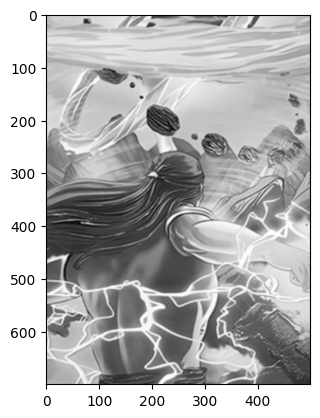

array([[202, 202, 202, ..., 188, 188, 188],
       [198, 198, 198, ..., 189, 189, 189],
       [189, 190, 191, ..., 191, 190, 190],
       ...,
       [177, 177, 178, ...,  54,  54,  54],
       [178, 178, 179, ...,  55,  55,  55],
       [178, 178, 179, ...,  55,  55,  55]], dtype=uint8)

In [50]:
zoom_image(gambar_abu,2)


In [ ]:

def scale_image(image):
    tinggi_gambar = image.shape[0]
    panjang_gambar = image.shape[1]
    depth = 1 if len(image.shape) == 2 else image.shape[2]
    
    # Membuat gambar baru dengan ukuran dua kali lipat dari gambar asli
    if depth > 1:
        gambar_baru = np.zeros((tinggi_gambar * 2, panjang_gambar * 2, depth), dtype=image.dtype)
    else:
        gambar_baru = np.zeros((tinggi_gambar * 2, panjang_gambar * 2), dtype=image.dtype)
    
    for i in range(tinggi_gambar):
        for j in range(panjang_gambar):
            i_aksen = i * 2
            j_aksen = j * 2
            if depth > 1:
                gambar_baru[i_aksen:i_aksen+2, j_aksen:j_aksen+2, :] = image[i, j, :]
            else:
                gambar_baru[i_aksen:i_aksen+2, j_aksen:j_aksen+2] = image[i, j]
    
    plt.imshow(gambar_baru, cmap="gray" if depth == 1 else None)
    plt.show()
    return gambar_baru


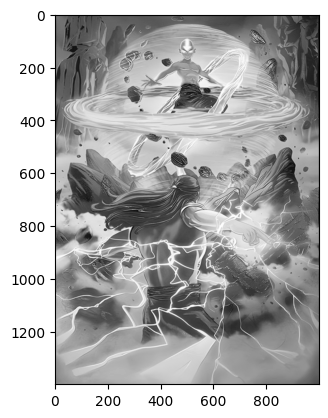

array([[169, 169, 123, ...,  27,  16,  16],
       [169, 169, 123, ...,  27,  16,  16],
       [164, 164, 115, ...,  37,  23,  23],
       ...,
       [148, 148, 131, ...,  83,  83,  83],
       [149, 149, 133, ...,  82,  82,  82],
       [149, 149, 133, ...,  82,  82,  82]], dtype=uint8)

In [51]:
scale_image(gambar_abu)